In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/content/pokemon.csv')

In [3]:
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:
data.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [5]:
data.drop(['type2'], axis =1, inplace = True
          )

In [9]:
data.weight_kg.fillna(data.weight_kg.mean(), inplace=True)

In [10]:
data.drop(['abilities','name','japanese_name'], axis =1, inplace = True)

In [11]:
data

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,88.100000,1,65,65,45,grass,6.9,1,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,88.100000,2,80,80,60,grass,13.0,1,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,88.100000,3,122,120,80,grass,100.0,1,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,88.100000,4,60,50,65,fire,8.5,1,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,88.100000,5,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,97,55.155761,797,107,101,61,steel,999.9,7,1
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,59,55.155761,798,59,31,109,grass,0.1,7,1
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,223,55.155761,799,97,53,43,dark,888.0,7,1
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,97,55.155761,800,127,89,79,psychic,230.0,7,1


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X = data.drop('is_legendary', axis =1)
y = data['is_legendary']

rfc = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step =1, cv =10, scoring = 'accuracy')

rfecv.fit(X.select_dtypes(exclude="object"), y)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

In [13]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))


Optimal Number of features is : 2


In [14]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [15]:
X

,base_egg_steps,base_total,type1,weight_kg,generation
0,5120,318,grass,6.9,1
1,5120,405,grass,13.0,1
2,5120,625,grass,100.0,1
3,5120,309,fire,8.5,1
4,5120,405,fire,19.0,1
...,...,...,...,...,...
796,30720,570,steel,999.9,7
797,30720,570,grass,0.1,7
798,30720,570,dark,888.0,7
799,30720,600,psychic,230.0,7


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [42]:
num_features = x_train.select_dtypes(exclude = "object")
cat_features = x_train.select_dtypes(include = "object")

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library
from sklearn.neural_network import MLPClassifier



step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(),num_features.columns )
    ],
    remainder='passthrough'
)

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm
import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import *

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Preprocess 'previous_year_rating' column


    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm


# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'HistGradientBoosting Classifier': HistGradientBoostingClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),


}
# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in tqdm(models.items()):
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

100%|██████████| 15/15 [00:03<00:00,  3.92it/s]

+---------------------------------+------------+-------------+----------+------------+--------------------+
| Model                           |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix   |
+=================================+============+=============+==========+============+====================+
| Logistic Regression             |   0.987578 |    0.993506 | 0.888889 |   0.934232 | [[152   0]         |
|                                 |            |             |          |            |  [  2   7]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Random Forest Classifier        |   0.987578 |    0.941155 | 0.941155 |   0.941155 | [[151   1]         |
|                                 |            |             |          |            |  [  1   8]]        |
+---------------------------------+------------+-------------+----------+------------+--------------------+
| Gradient Boosting Classifi

+---------------------------+----------+----------+----------+----------+-------------+-------------+------------+------------+
|                           |          |          |          |    Model | Accuracy    |   Precision | Recall     | F1 Score   |
+===========================+==========+==========+==========+==========+=============+=============+============+============+
| Support Vector Classifier | 0.993789 | 0.996732 | 0.944444 | 0.968949 | [[152   0]  |         nan | [0. 0. 1.] | [1. 1. 0.] |
|                           |          |          |          |          |  [  1   8]] |             |            |            |
+---------------------------+----------+----------+----------+----------+-------------+-------------+------------+------------+

The model with the highest accuracy is: Support Vector Classifier (Accuracy: 0.9938)


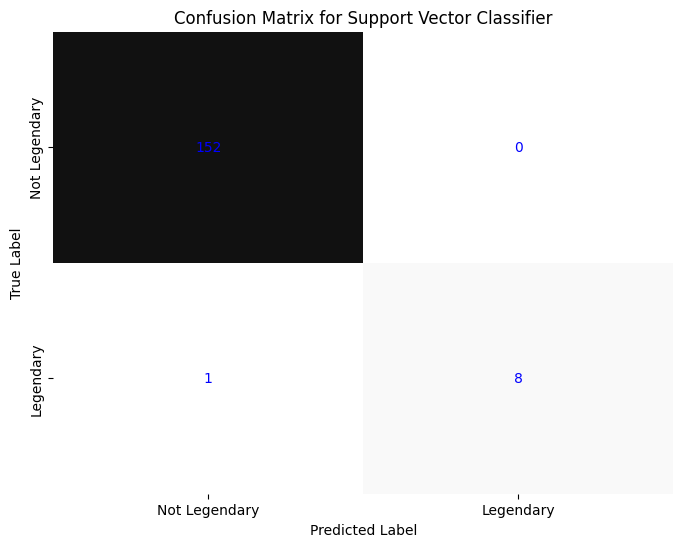

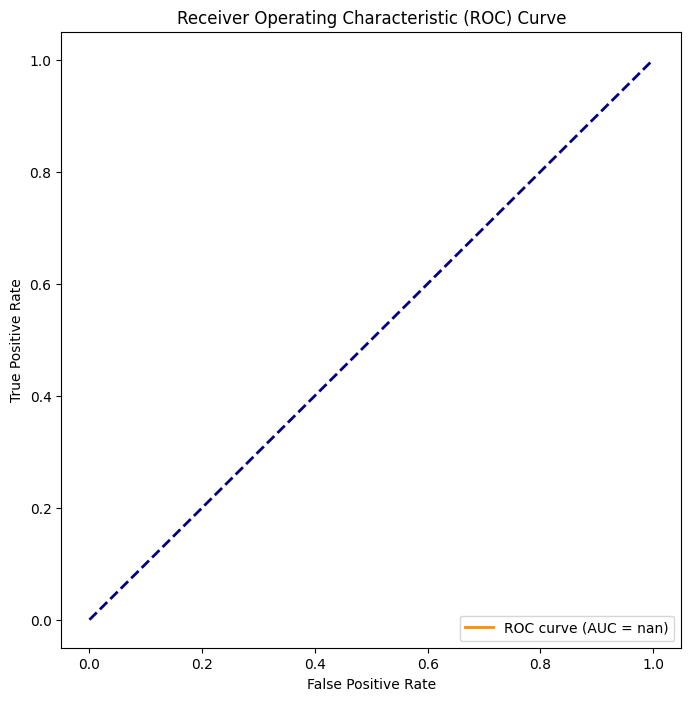

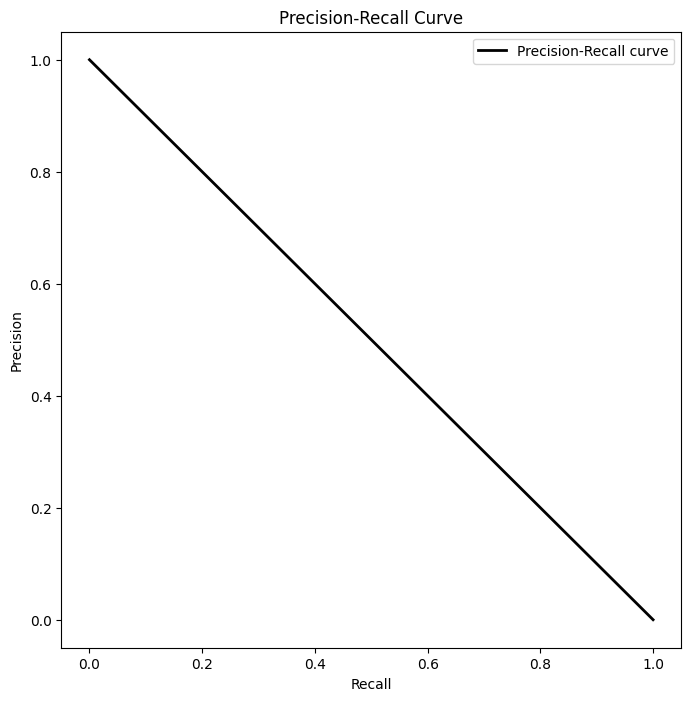

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your class labels (replace with your actual class labels)
class_labels = ['Not Legendary', 'Legendary']

# Define your step1 transformer (replace with your actual transformer)

def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Convert numerical labels to class labels
    label_mapping = {idx: label for idx, label in enumerate(class_labels)}
    y_test_labels = [label_mapping[label] for label in y_test]
    y_pred_labels = [label_mapping[label] for label in y_pred]

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average="macro")
    recall = recall_score(y_test_labels, y_pred_labels, average="macro")
    f1 = f1_score(y_test_labels, y_pred_labels, average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_labels)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='Legendary')
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred, pos_label='Legendary')

    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve

# Initialize different classification models
models = {
    'Support Vector Classifier': SVC()
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc, precision_curve, recall_curve = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm, roc_auc, precision_curve, recall_curve])


# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot confusion matrix with class labels and show labels
plt.figure(figsize=(8, 6))

# Show diagonal elements in red color
sns.heatmap(results[max_accuracy_index][5], annot=True, fmt="d", cmap="Greys", cbar=False, vmin=0, vmax=results[max_accuracy_index][5].diagonal().max() + 10, annot_kws={"color": "blue"})

plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][4], results[max_accuracy_index][3], color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(results[max_accuracy_index][6]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(results[max_accuracy_index][7], results[max_accuracy_index][8], color='black', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [52]:
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

svc_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_svc_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_svc_model.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy)



In [67]:
model = SVC()
model.fit(x_train, y_train)  # Training the model

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, model.predict(x_train))
train_precision = precision_score(y_train, model.predict(x_train), average='macro')
train_recall = recall_score(y_train, model.predict(x_train), average='macro')
train_f1 = f1_score(y_train, model.predict(x_train), average='macro')

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, model.predict(x_test))
test_precision = precision_score(y_test, model.predict(x_test), average='macro')
test_recall = recall_score(y_test, model.predict(x_test), average='macro')
test_f1 = f1_score(y_test, model.predict(x_test), average='macro')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})


In [68]:
metrics_df

,Metric,Train Set,Test Set
0,Accuracy,0.987500,0.993789
1,Precision,0.977310,0.996732
2,Recall,0.949093,0.944444
3,F1 Score,0.962659,0.968949


In [74]:
x_train.shape, y_train.shape

((640, 20), (720,))